in this project I'll be descovering and cleaning the dataset hotel source:
https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv
We are trying to findout what is the best time of the year to book a room


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hotel=pd.read_csv('hotel_bookings.csv')
hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [132]:
hotel.shape

(119390, 32)

First step is to remove the dublicates 

freq=hotel['arrival_date_month'].value_counts(dropna=True)
freq.plot(kind='bar')
freq.head(12)

In [133]:
hotel.drop_duplicates(inplace=True)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [134]:
#unwanted col
hotel.drop(['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','company','agent','days_in_waiting_list','required_car_parking_spaces','reservation_status_date'],axis=1,inplace=True)

In [135]:
#removing records where country is null
hotel.drop(hotel.loc[hotel.country.isnull()].index,inplace=True)
hotel.country.isnull().sum()

0

In [136]:
#children from float to int
hotel.children.loc[hotel.children.isnull()]=0
hotel.children=hotel.children.astype(int)

In [137]:
#removing outliers from adults
desc=hotel.adults.describe()
Q1=desc.loc['25%']
Q3=desc.loc['75%']
IQR=(Q3-Q1)*1.5
maxVal=min(Q3+ IQR, desc.loc['max'])
hotel.drop(hotel.loc[hotel.adults>maxVal].index,inplace=True)

In [138]:
#from mounth to number using dictionary
dic={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
hotel.arrival_date_month=hotel.arrival_date_month.map(dic)

In [139]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80937 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      80937 non-null  object 
 1   is_canceled                80937 non-null  int64  
 2   lead_time                  80937 non-null  int64  
 3   arrival_date_year          80937 non-null  int64  
 4   arrival_date_month         80937 non-null  int64  
 5   arrival_date_week_number   80937 non-null  int64  
 6   arrival_date_day_of_month  80937 non-null  int64  
 7   stays_in_weekend_nights    80937 non-null  int64  
 8   stays_in_week_nights       80937 non-null  int64  
 9   adults                     80937 non-null  int64  
 10  children                   80937 non-null  int32  
 11  babies                     80937 non-null  int64  
 12  meal                       80937 non-null  object 
 13  country                    80937 non-null  ob

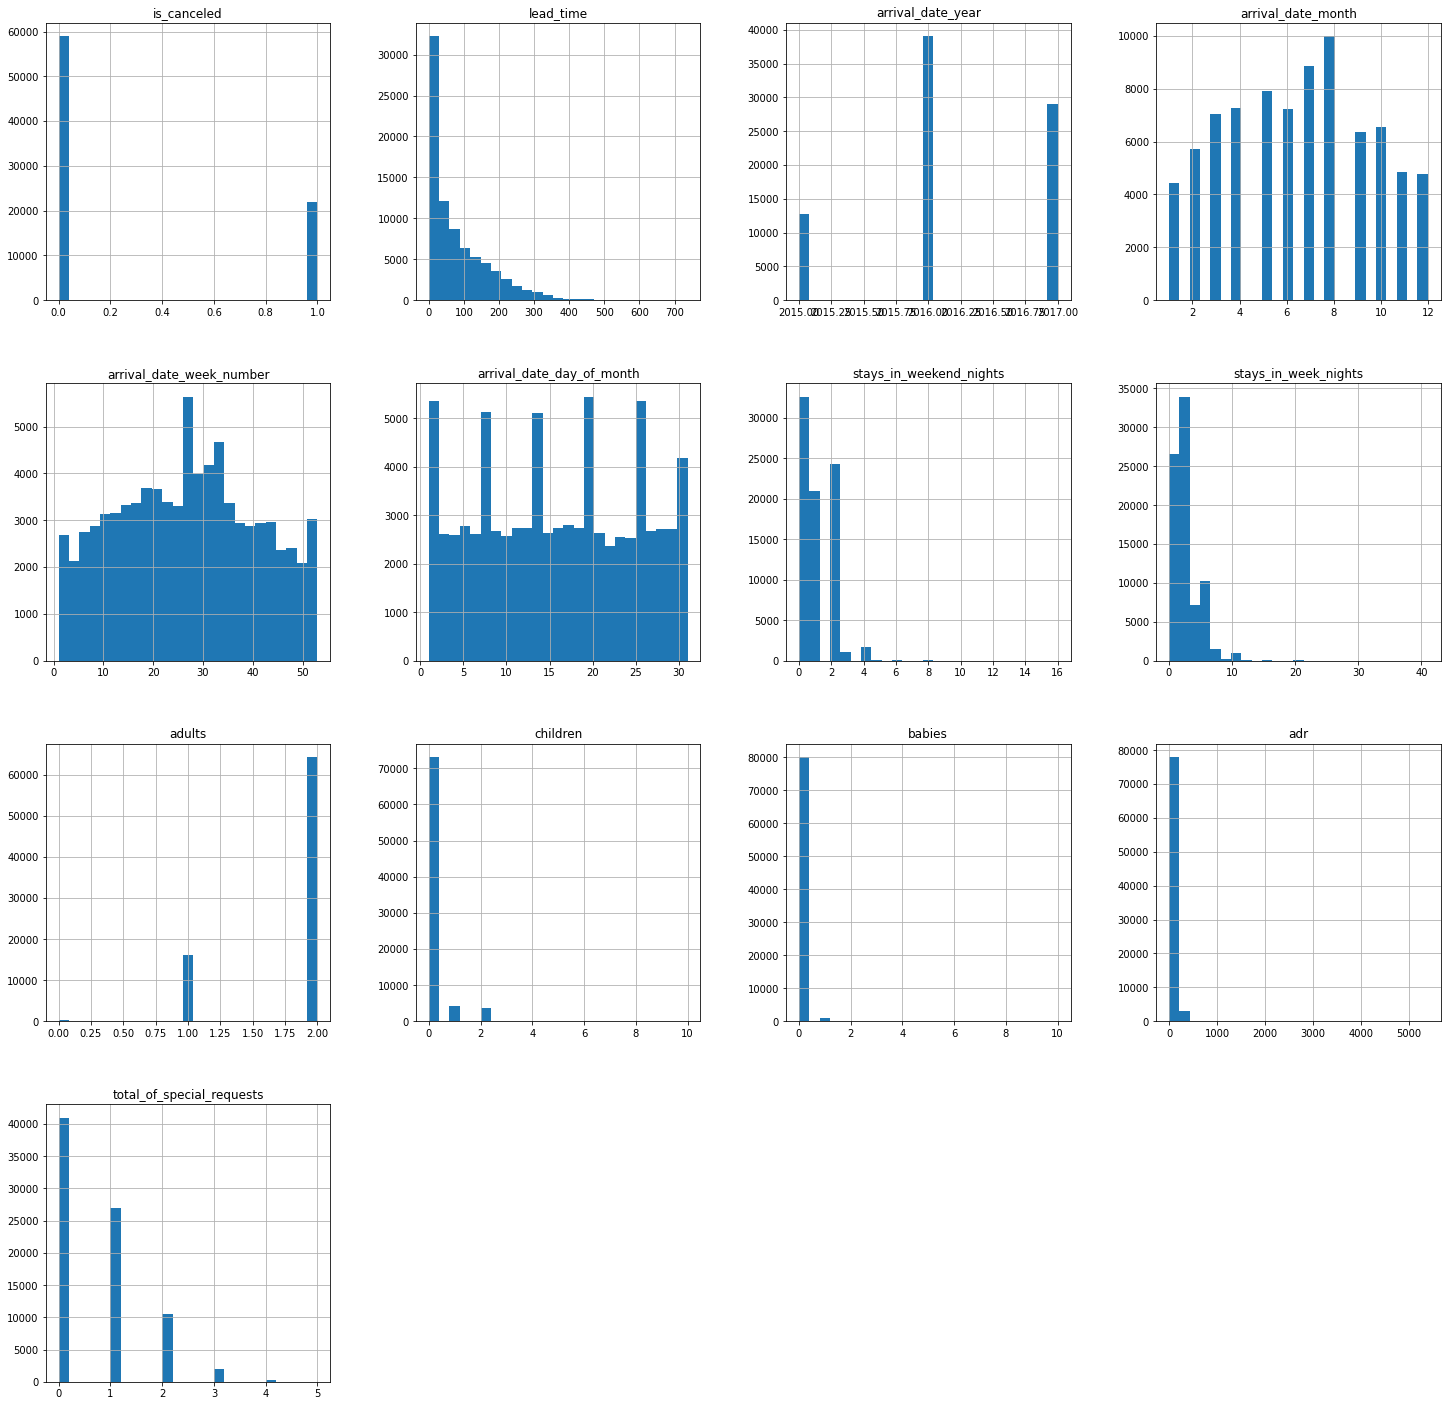

In [140]:
hotel.hist(figsize=(25,25),bins=25);

In [141]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,total_of_special_requests
count,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000,80937.000000
mean,0.270989,79.270445,2016.201626,6.472417,26.824963,15.802427,1.005029,2.621718,1.790281,0.142592,0.011478,102.762689,0.687028
std,0.444473,86.681738,0.690117,3.120082,13.772594,8.837507,1.034524,2.064736,0.418484,0.465517,0.117021,53.263839,0.823621
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,11.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,70.000000,0.000000
50%,0.000000,47.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,95.000000,0.000000
75%,1.000000,124.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,128.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,2.000000,10.000000,10.000000,5400.000000,5.000000


descovering the data and looking for null/ NA values

In [143]:
#For grouping data by 'hotel' col as it has to unique values

# ResortHotel=hotel[(hotel['hotel']=='Resort Hotel')]
# hotel.drop(hotel.loc[hotel['hotel']=='Resort Hotel'].index, inplace=True)

# CityHotel=hotel[(hotel['hotel']=='City Hotel')]
# hotel.drop(hotel.loc[hotel['hotel']=='City Hotel'].index, inplace=True)
